#####  k_means算法

 **1. 初始化质心**
- **输入参数**：设定簇的数量 **K**。
- **选择初始质心**：随机从数据集中选取K个点作为初始质心（也可用改进方法如K-means++优化初始化）。

 **2. 分配数据点到簇**
- **计算距离**：对每个数据点，计算其到所有质心的距离（通常用**欧氏距离**）。
- **划分簇**：将每个数据点分配到距离最近的质心对应的簇中。

**3. 更新质心位置**
- **重新计算质心**：对每个簇，计算其所有数据点的均值，将该均值作为新的质心。
  $$
  \text{质心坐标} = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
  $$
  其中 $C_k$是第k个簇的数据点集合。
**4. 迭代终止判断**
- **终止条件**：
  - 质心的位置不再变化（或变化量小于预设阈值）。
  - 达到最大迭代次数。
  - 簇的分配不再改变。
- **循环执行**：若未满足终止条件，返回步骤2继续迭代。

优化目标：
$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class kmeans:
    def __init__(self,data,num_clusters):
        self.data = data
        self.num_clusters = num_clusters
    def train(self , iterations):
        # 随机选择k个中心点
        centroids = kmeans.centroid_init(self.data,self.num_clusters)
        num_examples = self.data.shape[0]
        # 创建未初始化数组,值是随机值
        cloest_centroid_ids = np.empty((num_examples,1))
        for _ in range (iterations):
            # 计算每个样本点到k个中心点的距离，选取距离最小的，并成为其簇的成员
            cloest_centroid_ids = kmeans.find_cloest(self.data,centroids)
            # 更新中心点
            centroids = kmeans.change_centroids(self.data,cloest_centroid_ids,self.num_clusters)
        return centroids,cloest_centroid_ids
    @staticmethod 
    def change_centroids(data,cloest_centroid_ids,num_clusters):
        num_features = data.shape[1]
        centroids = np.zeros((num_clusters,num_features))
        for centroid_id in range(num_clusters):
            cloest_ids = cloest_centroid_ids == centroid_id
            centroids[centroid_id] = np.mean(data[cloest_ids.flatten(), :],axis = 0)
        return centroids
    @staticmethod 
    def find_cloest(data,centroids):
        num_examples = data.shape[0]
        num_centroids = centroids.shape[0]
        cloest_centroid_ids = np.zeros((num_examples,1))
        for example in range(num_examples):
            distance = np.zeros((num_centroids,1))
            for centroid in range(num_centroids):
                distance_diff = data[example,:] - centroids[centroid,:]
                distance[centroid] = np.sum(distance_diff**2)
            cloest_centroid_id = np.argmin(distance)
            cloest_centroid_ids[example] = cloest_centroid_id
        return cloest_centroid_ids
    
    @staticmethod    
    def centroid_init(data,num_clusters):
        num_examples = data.shape[0]
        """
            np.random.permutation: 返回新数组
                arr = np.array([1, 2, 3, 4])
                np.random.permutation(arr)  # 示例输出 array([3, 1, 4, 2])
                非破坏性操作：原始数据保持不变，生成一个新数组。
                随机性可控：通过 np.random.seed() 设置随机种子可复现结果
            np.random.shuffle :会原地修改原数组
            # 清洗数据操作
            indices = np.random.permutation(len(features))
            shuffled_features = features[indices]
            shuffled_labels = labels[indices]
        """
        random_ids = np.random.permutation(num_examples)
        centroids = data[random_ids[:num_clusters],:]
        return centroids


C:\Users\74203\AppData\Local\Temp\ipykernel_1400\2255215717.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


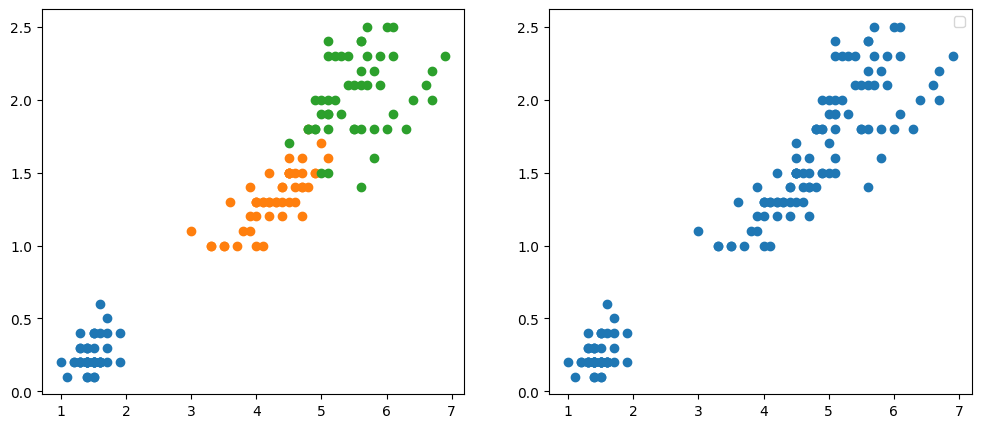

In [14]:
data = pd.read_csv('D:\Github_Files\machine_learning\machine_learning_practice\机器学习\逻辑回归\iris.csv')
iris_types = ['setosa','versicolor','virginica']
x_axis = 'Petal.Length'
y_axis = 'Petal.Width'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['Species'] == iris_type],data[y_axis][data['Species'] == iris_type])
plt.subplot(1,2,2)
plt.scatter(data[x_axis][:],data[y_axis][:])
plt.legend()
plt.show()

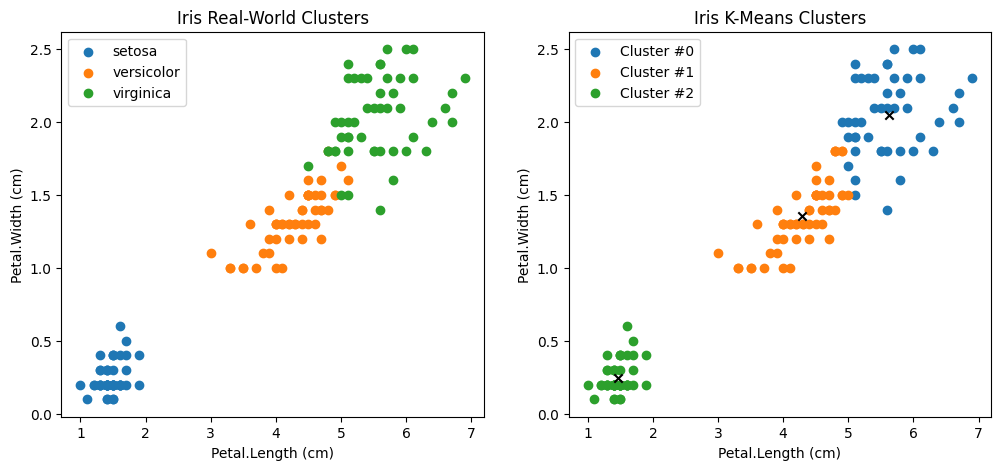

In [15]:
k = 3
num_examples = data.shape[0]
x_train = data[[x_axis,y_axis]].values.reshape((num_examples,2))
y_train = data['Species']
k_means = kmeans(x_train , k)
centroids,cloest_centroid_ids = k_means.train(50)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['Species'] == iris_type],
        data[y_axis][data['Species'] == iris_type],
        label=iris_type
    )
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Real-World Clusters')
plt.legend()

plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (cloest_centroid_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris K-Means Clusters')
plt.legend()

##### sklearn.cluster.Kmeans

In [16]:
# 创建聚类数据集
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [
        [0.2,2.3],
        [-1.5,2.3],
        [-2.8,1.8],
        [-2.8,2.8],
        [-2.8,1.3],
    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                cluster_std=blob_std,random_state=7)

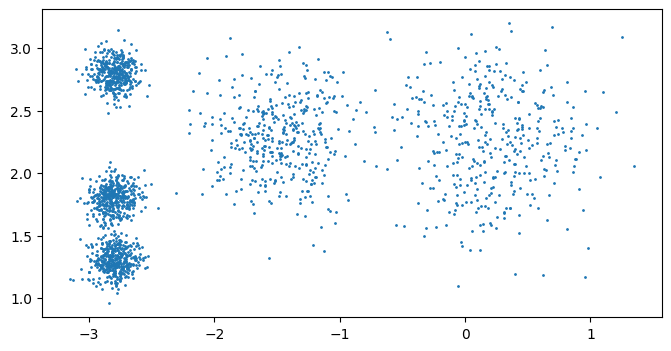

In [17]:
def plot_clustres(X,y=None):
    # s:size c:color
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.figure(figsize=(8,4))
plot_clustres(X)
plt.show()

In [18]:
from sklearn.cluster import KMeans , DBSCAN
num_clusters = 5
# random_state 控制质心初始化的随机数生成的,控制初始化过程的随机性，确保结果可复现。
# 增大 n_init 参数（默认为10），让算法尝试多次初始化并选择最优解
# KMeans假设簇是凸形且方差相近，若数据不满足（如标准差差异大、簇重叠），即使固定 random_state，聚类效果仍可能不佳。
# 即使固定 random_state，聚类效果仍可能不佳。
kmeans = KMeans(n_clusters=num_clusters,random_state=42)

kmeans.fit_predict(X) 与 kmeans.labels_ 结果一致

In [19]:
y_pred = kmeans.fit_predict(X)
y1 = kmeans.predict([[0,2]])
y2 = kmeans.predict([[1,2]])
print(y1)
print(y2)

[0]
[4]


In [20]:
kmeans.labels_ # 聚类标签

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

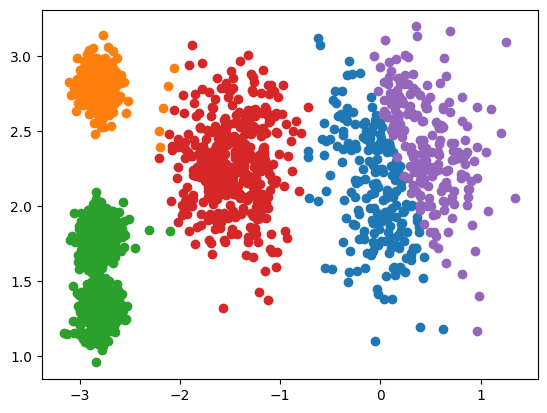

In [21]:
# TODO 绘制上图的预测结果
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y_pred == cluster],X[:,1][y_pred == cluster])
plt.show()
# 可视化没问题，k_means分类结果正是如此,random_state=42（42宇宙所有问题的答案）,当random_state=1时效果好
# 生成的数据中前两个簇的标准差较大（0.4 和 0.3），而后三个簇的标准差很小（0.1）。
# KMeans 假设簇是凸形且方差相近，若某些簇分布范围较广（标准差大），可能会导致聚类中心偏移或错误分割。


In [22]:
iter1 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=1,random_state=1)
iter2 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=2,random_state=1)
iter3 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=3,random_state=1)

iter1.fit(X)  # y1.cluster_centers_
iter2.fit(X)
iter3.fit(X)

y1 = iter1.predict(X)
y2 = iter2.predict(X)
y3 = iter3.predict(X)

In [23]:
iter1.cluster_centers_  # 聚类中心

array([[ 0.20667809,  2.25769931],
       [-2.81516042,  1.24374222],
       [-2.75767277,  1.4162973 ],
       [-2.79117056,  2.30122618],
       [-1.46744042,  2.30621642]])

C:\Users\74203\AppData\Local\Temp\ipykernel_1400\68136870.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


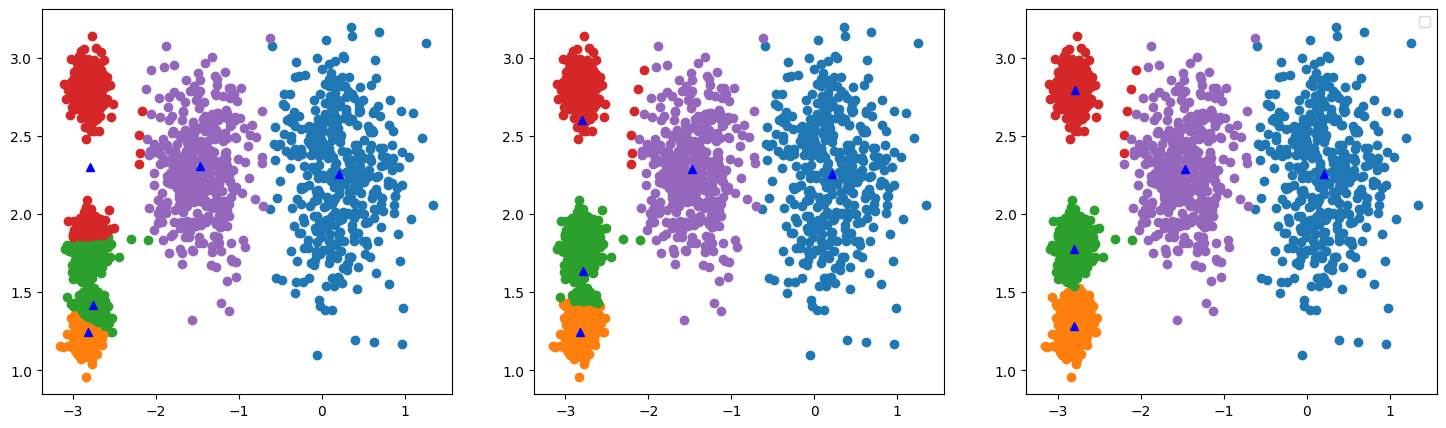

In [24]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(iter1.cluster_centers_[:,0],iter1.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y1 == cluster],X[:,1][y1 == cluster])
plt.subplot(132)
plt.plot(iter2.cluster_centers_[:,0],iter2.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y2 == cluster],X[:,1][y2 == cluster])
plt.subplot(133)
plt.plot(iter3.cluster_centers_[:,0],iter3.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y3 == cluster],X[:,1][y3 == cluster])
plt.legend()
plt.show()

In [ ]:
# TODO kmeans.transform  评估指标inertia_